<a href="https://colab.research.google.com/github/kulothungan-dataguy/Correlation_project_Movieskaggle_python/blob/main/Correlation_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
df = pd.read_csv("movies.csv")

In [ ]:
df.shape


(7668, 15)

In [ ]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [ ]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col,pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
#df['budget'] = df['budget'].astype(str).apply(lambda x: x.replace('.0',''))
#df['gross'] = df['gross'].astype(str).apply(lambda x: x.replace('.0',''))
#df['budget'] = df['budget'].astype(int)


In [ ]:
import re
#df['released'].fillna(value=0)
df['correctedyear'] =  df['released'].apply(lambda x: (re.findall(r',*[0-9][0-9][0-9][0-9]', str(x))))

#df['correctedyear'] =  df['correctedyear'].apply(lambda x: x.to_string())
#df['correctedyear'] =  df['correctedyear'].apply(lambda x: x[1:4], str(x)))
#df['correctedyear']= df['released'].str.extract(r',*[0-9]+')




In [ ]:
# Budget high correlation
# company high correlation
df['gross'].fillna(value=0)
df['gross'] = pd.to_numeric(df['gross'],errors='coerce')
df['budget'].fillna(value=0)
df['budget'] = pd.to_numeric(df['budget'],errors='coerce')

df.dtypes

name              object
rating            object
genre             object
year               int64
released          object
score            float64
votes            float64
director          object
writer            object
star              object
country           object
budget           float64
gross            float64
company           object
runtime          float64
correctedyear     object
dtype: object

In [ ]:
df['correctedyear'] = df['correctedyear'].str[0]
df['correctedyear'].fillna(value=0)
df['correctedyear'] = pd.to_numeric(df['correctedyear'],errors='coerce')


In [ ]:
df = df.sort_values(by=['gross'], inplace = False , ascending = True)

In [ ]:
#drop my duplicates

#df['company'].drop_duplicates().sort_values(ascending=False)

In [ ]:
df = df.drop_duplicates()

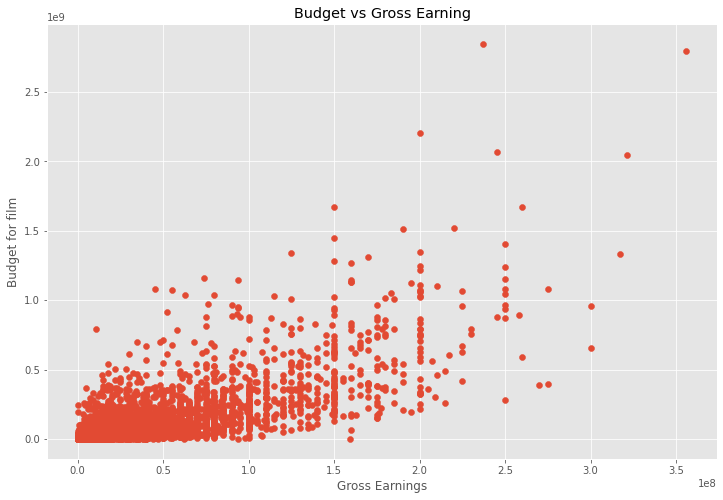

In [ ]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')



plt.show()

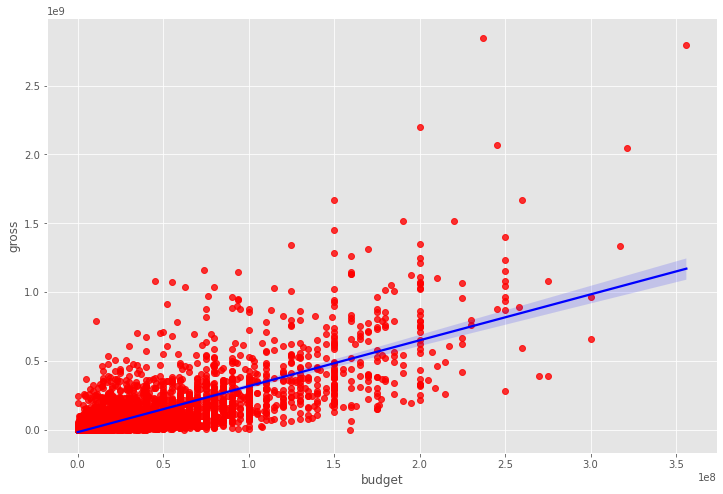

In [ ]:
sns.regplot(x='budget',y='gross',data = df,scatter_kws = {'color':'red'},line_kws = {'color':'blue'})

In [ ]:
df.corr()

year     score     votes    budget     gross   runtime  \
year           1.000000  0.097995  0.222945  0.329321  0.257486  0.120811   
score          0.097995  1.000000  0.409182  0.076254  0.186258  0.399451   
votes          0.222945  0.409182  1.000000  0.442429  0.630757  0.309212   
budget         0.329321  0.076254  0.442429  1.000000  0.740395  0.320447   
gross          0.257486  0.186258  0.630757  0.740395  1.000000  0.245216   
runtime        0.120811  0.399451  0.309212  0.320447  0.245216  1.000000   
correctedyear  0.997415  0.105994  0.218429  0.321918  0.250514  0.120636   

               correctedyear  
year                0.997415  
score               0.105994  
votes               0.218429  
budget              0.321918  
gross               0.250514  
runtime             0.120636  
correctedyear       1.000000

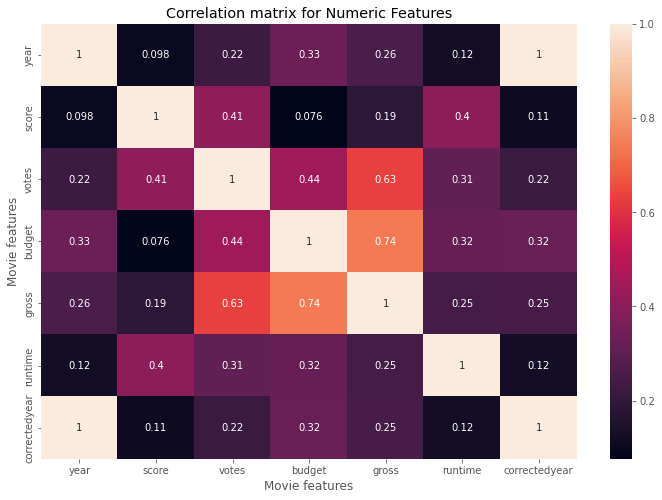

In [ ]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
3203  6990       5      4  1997      2811    5.7     5800.0       961     229   
2417  3406      -1      6  1993        85    7.3     5100.0        33    1718   
7580  4664       3      5  2019      1835    5.2      735.0      1445    2203   
7625  6720      -1      4  2019      1149    5.7      320.0      2546    2565   
3818  3360       6      4  2000      1119    6.5     5200.0       730    1123   
2906  4400       3      5  1996       525    7.4    37000.0      2045    1957   
3394  2682       6      5  1998      3036    6.1     2900.0      1949    1278   
5524  3976      10      6  2009       975    5.1     1600.0      2231    3423   
6030   429       6      6  2011       838    5.8     1900.0       910    2593   
272   4160       6     10  1982      1974    3.9     2300.0       406      76   
820   1269       6      3  1985      3055    7.5     2800.0      1115    1720   
2003  4749       6     10  1991      2069    5.2     2700.0       873    2319   
5634  1438       3      6  2009       483    6.1     1500.0      1951    3025   
3681  2219       3      6  2000      2246    6.8    43000.0      1386    2382   
7233  5343       8      4  2017      2480    6.1     4900.0      2104    3045   
638   7389      -1      6  1984       934    7.3       67.0      2444      78   
2434  4237       5      0  1993      1899    4.5     1900.0      2601    4392   
3369  6878       6      0  1998      3286    7.2    18000.0      2575    3967   
7653  6479       6      5  2020        93    5.4     2400.0      2517    3877   
298   6635      -1      6  1982       969    7.0     3000.0      2906    3648   
3170  1957       6      4  1997       233    6.7    10000.0       616    3168   
4388  5952       6      4  2003      2062    7.3    21000.0       100     179   
3428   110       5      6  1998      1310    6.2     2900.0      1425    2953   
1820  5895      10      6  1990         6    6.4      840.0       708      -1   
5640  5374       6      6  2009      1184    5.8     3500.0       860    4144   
123   3804       4      3  1981      2828    7.8    19000.0      1711    4393   
760   1361       5      4  1985       170    5.7     5300.0      2480    1323   
7610   873       6     10  2019       183    4.8     1900.0      2442    3767   
949   7302       3      2  1986      1967    7.7    10000.0      1320    3494   
3597  1278       6      4  1999        88    4.4     1600.0       512     785   
923   1069      -1      3  1986       500    6.6     5500.0       708    1096   
3209  3080       3      0  1997       994    7.9    28000.0      2733    4193   
3837  6309       6      5  2000      2240    5.1     1500.0      2484     267   
7424  1702       3      4  2018       192    5.3     3500.0      1960    3035   
3319  2680       3      5  1998       963    7.4    22000.0       936    1437   
6166  5902       5      4  2012       191    6.7     9800.0      1675    2564   
6147   233       6      6  2012       600    4.8    10000.0      2603    4005   
1035  1707       6      6  1986       985    6.8      840.0       126    4275   
3229  1755       6      4  1997      1041    6.2     2900.0      1898    2935   
2019  5332       3      4  1991       780    6.9     3500.0        78     130   
3024  4745       3      4  1996       276    6.8     5300.0      2659    4083   
3135  5381       3      6  1997      2704    7.8    26000.0         6      15   
6543  2972       6      4  2014       168    6.4    18000.0       525     961   
5761  1765       6      4  2010      1994    5.1     7000.0      2529    3898   
2639  4583       3      6  1994      2849    6.6     1800.0      1575    1986   
3438  2464       6      5  1998      1214    4.7     2500.0      2813    4308   
7421  5253       3      4  2018       729    5.5     2900.0       219     382   
171   4407       6      6  1981      2976    6.3     1300.0      1171    1891   
54    1205       6      4  1980      

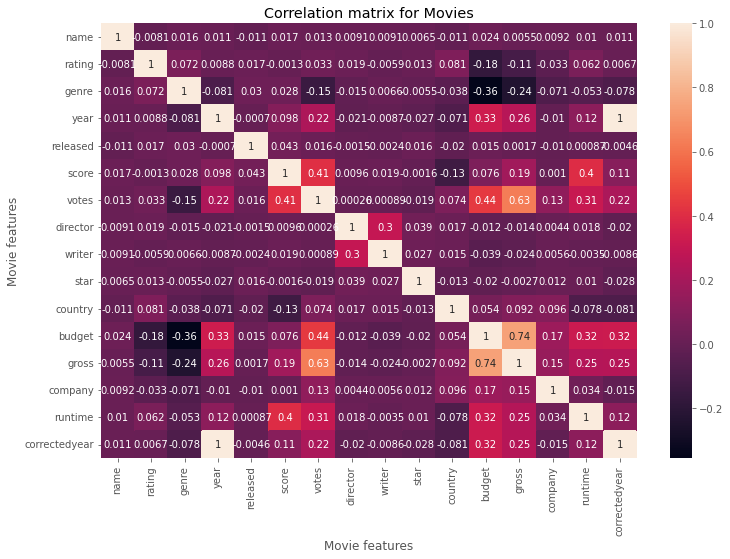

In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
correlation_mat = df_numerized.corr(method='pearson')
corr_pairs = correlation_mat.unstack()
corr_pairs

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               year             0.011453
               released        -0.011311
               score            0.017097
               votes            0.013088
               director         0.009079
               writer           0.009081
               star             0.006472
               country         -0.010737
               budget           0.023970
               gross            0.005533
               company          0.009211
               runtime          0.010392
               correctedyear    0.010699
rating         name            -0.008069
               rating           1.000000
               genre            0.072423
               year             0.008779
               released         0.016613
               score           -0.001314
               votes            0.033225
               director         0.019483
               w

In [ ]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs 

genre          budget          -0.356564
budget         genre           -0.356564
genre          gross           -0.235650
gross          genre           -0.235650
rating         budget          -0.176002
budget         rating          -0.176002
votes          genre           -0.145307
genre          votes           -0.145307
score          country         -0.133348
country        score           -0.133348
gross          rating          -0.107339
rating         gross           -0.107339
year           genre           -0.081261
genre          year            -0.081261
correctedyear  country         -0.080844
country        correctedyear   -0.080844
               runtime         -0.078412
runtime        country         -0.078412
genre          correctedyear   -0.077911
correctedyear  genre           -0.077911
genre          company         -0.071067
company        genre           -0.071067
year           country         -0.070938
country        year            -0.070938
genre          r

In [ ]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes          gross            0.630757
gross          votes            0.630757
               budget           0.740395
budget         gross            0.740395
year           correctedyear    0.997415
correctedyear  year             0.997415
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
correctedyear  correctedyear    1.000000
dtype: float64